<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/ResoluteAI_Task_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install feature-engine --q
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.2 MB/s eta 0:00:00


In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [209]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.pipeline import Pipeline


from feature_engine.selection import SmartCorrelatedSelection


import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import kerastuner as kt


plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_excel('/content/gdrive/MyDrive/DataSets/Task1and2/train.xlsx')

In [75]:
df.shape

(36752, 19)

In [76]:
df.sample(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
2059,-72,-80,-72,-69,-71,-64,-75,-55,-46,-76,-67,-65,-67,-59,-75,-63,-51,-39,B71
29298,-81,-63,-61,-62,-61,-53,-66,-68,-67,-62,-68,-64,-56,-66,-55,-61,-69,-71,A42
12983,-62,-63,-58,-56,-48,-64,-55,-59,-64,-81,-62,-65,-55,-46,-61,-63,-59,-64,B40
20582,-68,-63,-56,-56,-59,-59,-67,-65,-74,-58,-53,-58,-58,-61,-61,-58,-64,-66,B20
24951,-60,-61,-53,-51,-69,-61,-78,-69,-73,-69,-66,-56,-49,-67,-62,-72,-79,-67,A30


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [78]:
df.describe() \
.T \
.style \
.background_gradient('crest',axis=0)

,count,mean,std,min,25%,50%,75%,max
T1,36752.000000,-65.865449,8.737286,-95.000000,-72.000000,-66.000000,-61.000000,-41.000000
T2,36752.000000,-64.521931,8.914559,-95.000000,-70.000000,-65.000000,-59.000000,-37.000000
T3,36752.000000,-64.574472,8.154517,-95.000000,-70.000000,-64.000000,-59.000000,-41.000000
T4,36752.000000,-65.296474,8.142803,-95.000000,-70.000000,-66.000000,-61.000000,-39.000000
T5,36752.000000,-64.462152,8.068375,-95.000000,-69.000000,-65.000000,-59.000000,-36.000000
T6,36752.000000,-63.318731,8.651501,-95.000000,-69.000000,-63.000000,-57.000000,-39.000000
T7,36752.000000,-67.030202,9.257529,-95.000000,-74.000000,-66.000000,-60.000000,-45.000000
T8,36752.000000,-66.591260,10.160193,-95.000000,-75.000000,-66.000000,-59.000000,-39.000000
T9,36752.000000,-65.692479,10.598247,-95.000000,-73.000000,-65.000000,-58.000000,-39.000000
T10,36752.000000,-65.555181,10.408147,-95.000000,-73.000000,-65.000000,-58.000000,-37.000000


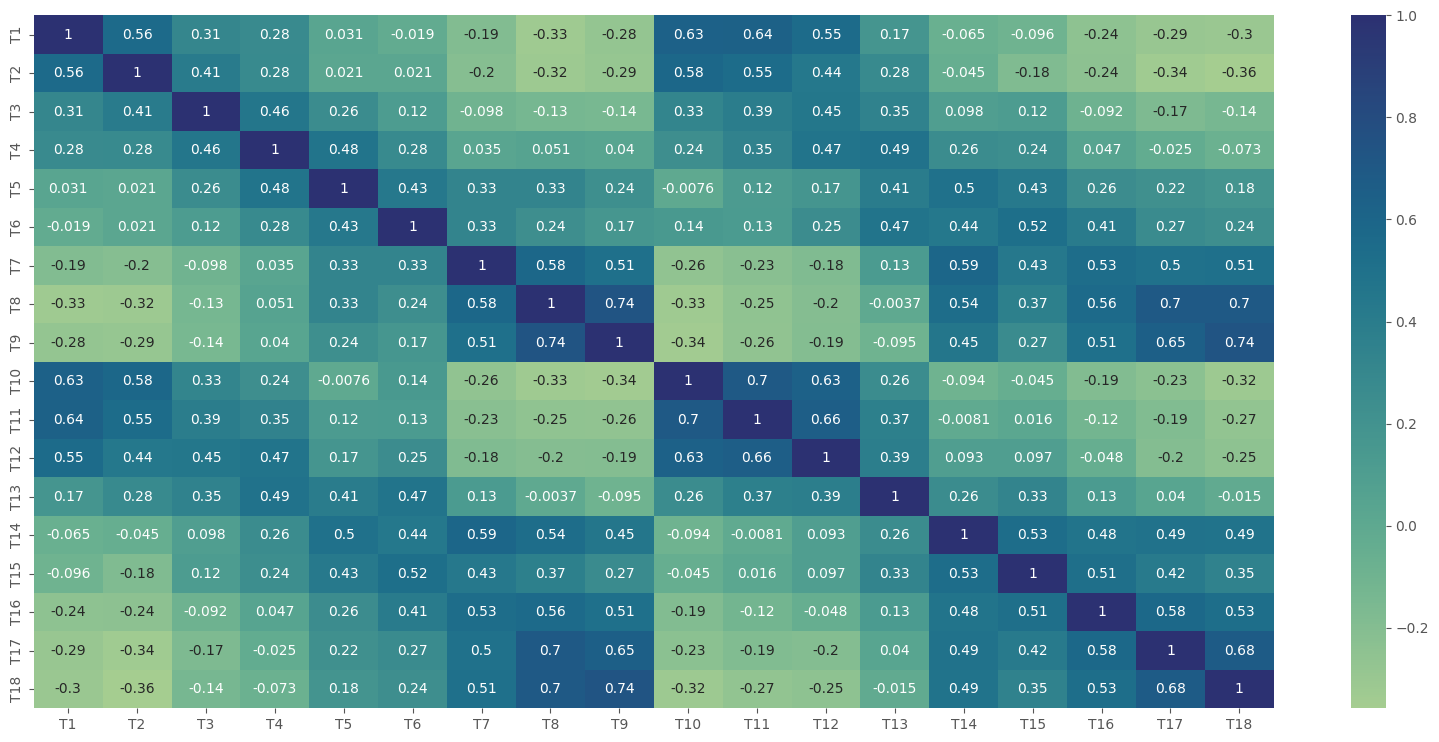

In [79]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

# plan of action to develop clustering program

	- 1 First create a deep learning model using keras and fit the original data to it so we can get the base result which later help us to evaluate the performance improvements
		- 1.1 Without Preprocessing
		- 1.2 With Preprocessing

	- 2 Second approch is use feature selection techneques to reduce the complexcity and the fit the deep learning model and compare that to base results
		- 2.1 Without Preprocessing
		- 2.2 With Preprocessing

	- Observation (Based on the results Select the apporch)
	- fine tuned the deep learning model using keras tuner
	- Evaluate the model and compare it with previous model results
	- Save the model

In [81]:
X,y = df.drop(['target'],axis=1),df['target']
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.3, random_state=101,stratify=y_other)

# 1 **First create a deep learning model using keras and fit the original data to it so we can get the base result which later help us to evaluate the performance improvements.**
    - 1.1 Without Preprocessing
    - 1.2 With Preprocessing

### 1.1 **Without Preprocessing**

In [83]:
y_train_transformed = pd.get_dummies(y_train)
y_val_transformed = pd.get_dummies(y_val)
y_test_transformed = pd.get_dummies(y_test)

In [84]:
X_train.shape,X_val.shape,X_test.shape

((25726, 18), (7718, 18), (3308, 18))

In [85]:
Model_1_1 = Sequential()
Model_1_1.add(Input(shape=X_train.shape[1]))
Model_1_1.add(Dense(units=32,activation='relu'))
Model_1_1.add(Dense(units=16,activation='relu'))
Model_1_1.add(Dense(units=160,activation='softmax'))

Model_1_1.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [86]:
Model_1_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                608       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3856 (15.06 KB)
Trainable params: 3856 (15.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
Model_1_1.fit(X_train,y_train_transformed,epochs=300,batch_size=256,validation_data=(X_val,y_val_transformed))

Epoch 1/300
101/101 [==============================] - 1s 6ms/step - loss: 7.0377 - categorical_crossentropy: 7.0377 - val_loss: 4.8884 - val_categorical_crossentropy: 4.8884
Epoch 2/300
101/101 [==============================] - 0s 4ms/step - loss: 4.5502 - categorical_crossentropy: 4.5502 - val_loss: 4.1742 - val_categorical_crossentropy: 4.1742
Epoch 3/300
101/101 [==============================] - 0s 4ms/step - loss: 3.7259 - categorical_crossentropy: 3.7259 - val_loss: 3.2544 - val_categorical_crossentropy: 3.2544
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 2.8523 - categorical_crossentropy: 2.8523 - val_loss: 2.5441 - val_categorical_crossentropy: 2.5441
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 2.3023 - categorical_crossentropy: 2.3023 - val_loss: 2.1251 - val_categorical_crossentropy: 2.1251
Epoch 6/300
101/101 [==============================] - 0s 4ms/step - loss: 1.9554 - categorical_crossentropy: 1.9554 - val_lo

In [202]:
def ShowResultPlot(model=None):
    """
    Plot training and validation metrics from the model's history.

    Parameters:
    - model (keras.Model or None): The trained Keras model. If None, an empty plot will be shown.

    Returns:
    - pd.DataFrame: DataFrame containing the training history.
    """

    # Extract the training history from the model
    model_result = pd.DataFrame(model.history.history)

    # Create subplots for displaying multiple plots in a single figure
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    # Plot the training and validation loss
    ax[0].set_title('Loss vs Validation Loss')
    ax[0].plot(model_result['loss'], label='loss')
    ax[0].plot(model_result['val_loss'], label='val_loss')
    ax[0].set_xlabel('Num of epochs')
    ax[0].set_ylabel('Crossentropy')
    ax[0].legend()

    # Plot the training and validation categorical crossentropy
    ax[1].set_title('Categorical Crossentropy vs Validation Categorical Crossentropy')
    ax[1].plot(model_result['categorical_crossentropy'], label='categorical_crossentropy')
    ax[1].plot(model_result['val_categorical_crossentropy'], label='val_categorical_crossentropy')
    ax[1].set_xlabel('Num of epochs')
    ax[1].set_ylabel('Crossentropy')
    ax[1].legend()

    # Display the plot
    plt.show()

#### 1.1.1 **Without Preprocessing Observation**

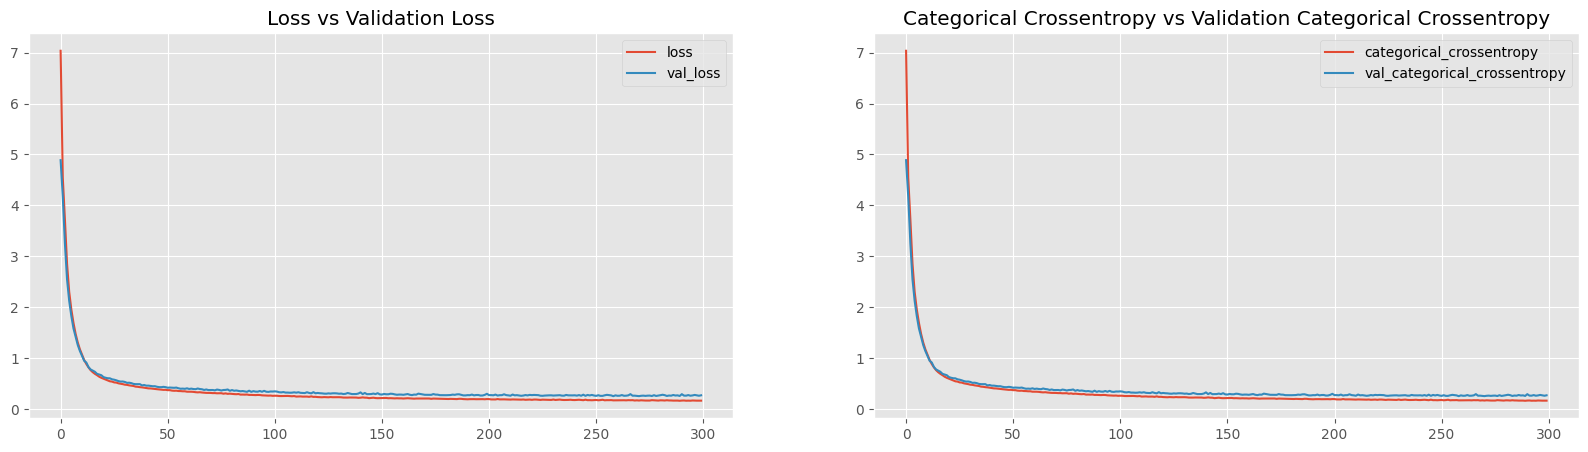

In [89]:
ShowResultPlot(Model_1_1)

In [90]:
def ShowModelResults(model=None, X_val=None, X_test=None, y_val=None, y_test=None):
    """
    Evaluate the performance of a model on validation and test datasets and print the results.

    Parameters:
    - model (keras.Model or None): The trained Keras model.
    - X_val (numpy.ndarray or None): Validation input data.
    - X_test (numpy.ndarray or None): Test input data.
    - y_val (numpy.ndarray or None): Validation target data.
    - y_test (numpy.ndarray or None): Test target data.

    Prints:
    - Precision, Recall, and F1-score for both validation and test datasets.
    """

    # Predictions on validation and test datasets
    model_val_pred = model.predict(X_val)
    model_test_pred = model.predict(X_test)

    # Convert one-hot encoded predictions to class labels
    model_val_orig = np.array(y_val).argmax(axis=1)
    model_val_predictions = model_val_pred.argmax(axis=1)

    model_test_orig = np.array(y_test).argmax(axis=1)
    model_test_predictions = model_test_pred.argmax(axis=1)

    # Compute and print evaluation metrics for the validation dataset

    print("\nValidation Dataset Results:")
    print(f"Precision Score: {precision_score(model_val_orig, model_val_predictions, average='weighted')}")
    print(f"Recall Score: {recall_score(model_val_orig, model_val_predictions, average='weighted')}")
    print(f"F1 Score: {f1_score(model_val_orig, model_val_predictions, average='weighted')}")

    # Compute and print evaluation metrics for the test dataset
    print("\nTest Dataset Results:")
    print(f"Precision Score: {precision_score(model_test_orig, model_test_predictions, average='weighted')}")
    print(f"Recall Score: {recall_score(model_test_orig, model_test_predictions, average='weighted')}")
    print(f"F1 Score: {f1_score(model_test_orig, model_test_predictions, average='weighted')}")

In [91]:
ShowModelResults(model=Model_1_1,X_val=X_val,X_test=X_test,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 2ms/step

Validation Dataset Results:
Precision Score: 0.9538063111046422
Recall Score: 0.9533557916558694
F1 Score: 0.9529298251180423

Test Dataset Results:
Precision Score: 0.959442202526401
Recall Score: 0.9570737605804112
F1 Score: 0.956713406312731


### 1.2 **With Preprocessing**

In [92]:
stdscaler = StandardScaler()
X_train_transformed = stdscaler.fit_transform(X_train,y_train_transformed)
X_val_transformed = stdscaler.transform(X_val)
X_test_transformed = stdscaler.transform(X_test)

In [93]:
X_train_transformed.shape

(25726, 18)

In [94]:
Model_1_2 = Sequential()
Model_1_2.add(Input(shape=X_train.shape[1]))
Model_1_2.add(Dense(units=32,activation='relu'))
Model_1_2.add(Dense(units=16,activation='relu'))
Model_1_2.add(Dense(units=160,activation='softmax'))

Model_1_2.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [95]:
Model_1_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                608       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3856 (15.06 KB)
Trainable params: 3856 (15.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
Model_1_2.fit(X_train_transformed,y_train_transformed,epochs=300,batch_size=256,validation_data=(X_val_transformed,y_val_transformed))

Epoch 1/300
101/101 [==============================] - 1s 5ms/step - loss: 4.8005 - categorical_crossentropy: 4.8005 - val_loss: 4.2223 - val_categorical_crossentropy: 4.2223
Epoch 2/300
101/101 [==============================] - 0s 5ms/step - loss: 3.3728 - categorical_crossentropy: 3.3728 - val_loss: 2.5635 - val_categorical_crossentropy: 2.5635
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 1.9885 - categorical_crossentropy: 1.9885 - val_loss: 1.4895 - val_categorical_crossentropy: 1.4895
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 1.1580 - categorical_crossentropy: 1.1580 - val_loss: 0.8891 - val_categorical_crossentropy: 0.8891
Epoch 5/300
101/101 [==============================] - 1s 7ms/step - loss: 0.7170 - categorical_crossentropy: 0.7170 - val_loss: 0.5899 - val_categorical_crossentropy: 0.5899
Epoch 6/300
101/101 [==============================] - 1s 7ms/step - loss: 0.5014 - categorical_crossentropy: 0.5014 - val_lo

#### 1.2.1 **With Preprocessing Observation**

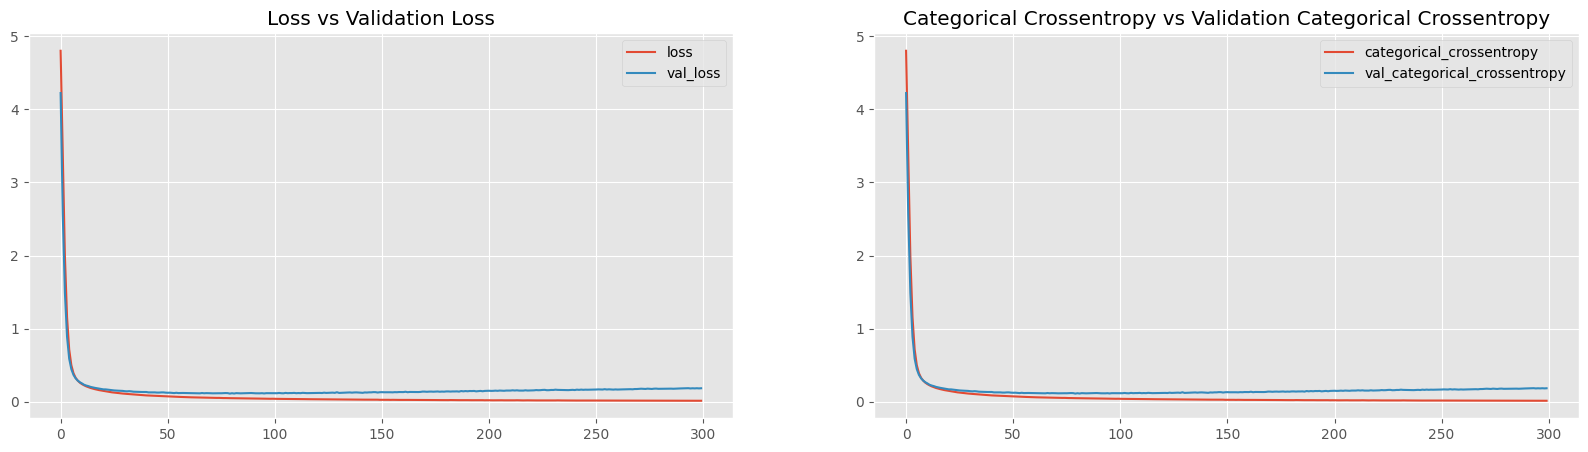

In [97]:
ShowResultPlot(model=Model_1_2)

In [98]:
ShowModelResults(model=Model_1_2,X_val=X_val_transformed,X_test=X_test_transformed,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 1ms/step

Validation Dataset Results:
Precision Score: 0.9800860277786542
Recall Score: 0.9793988079813423
F1 Score: 0.9793840688944555

Test Dataset Results:
Precision Score: 0.9740257135277257
Recall Score: 0.9730955259975816
F1 Score: 0.9728587812802325


# 2 **Second approch is use feature selection techniques to reduce the complexcity and the fit the deep learning model and compare that to base results.**
    - 2.1 Without Preprocessing
    - 2.2 With Preprocessing

In [99]:
sel = SelectKBest(mutual_info_classif, k=10).fit(X, y)
Selected_Features = list(X_train.columns[sel.get_support()])
new_df = df[Selected_Features+['target']]

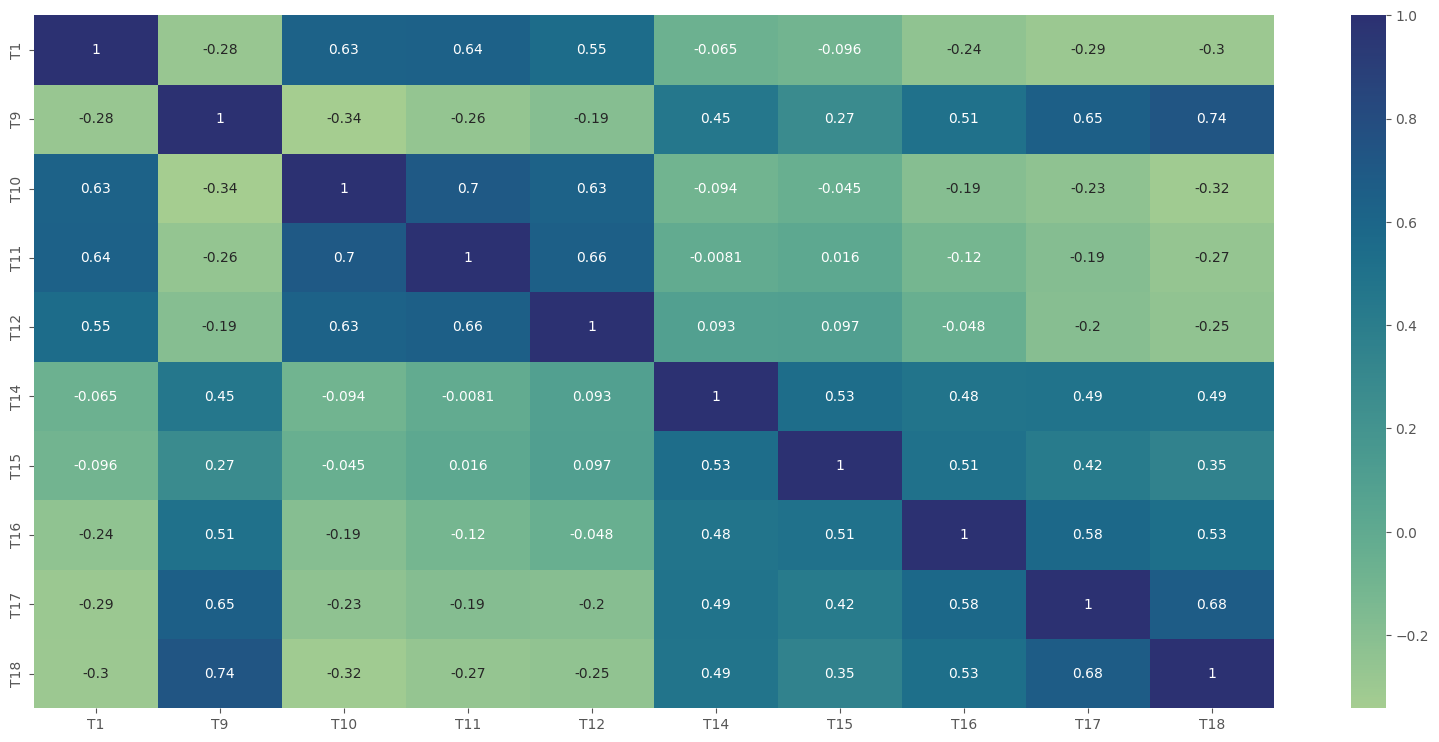

In [100]:
plt.figure(figsize=(20,9))
sns.heatmap(new_df.corr(),annot=True,cmap="crest")
plt.show()

In [101]:
scs = SmartCorrelatedSelection(threshold=0.65)
sel_df = scs.fit_transform(new_df)

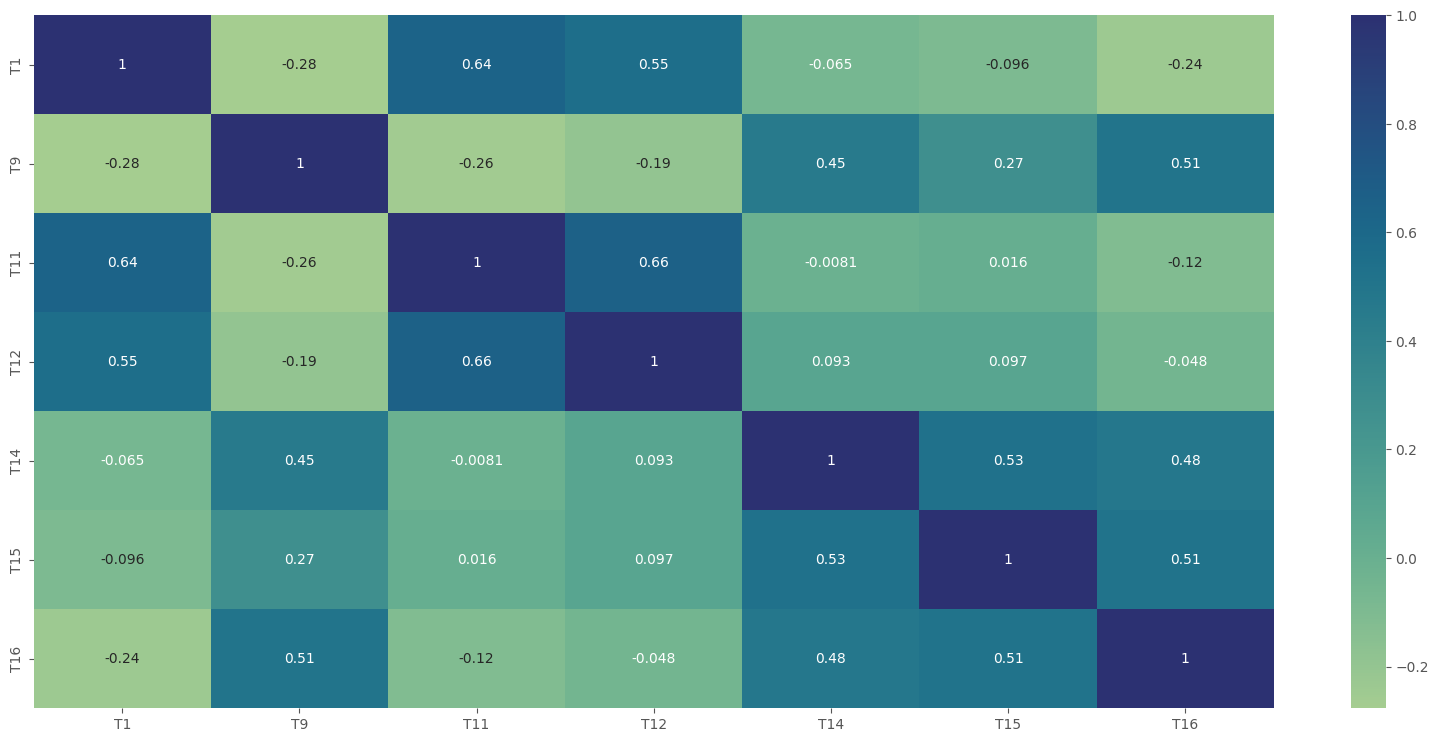

In [102]:
plt.figure(figsize=(20,9))
sns.heatmap(sel_df.corr(),annot=True,cmap="crest")
plt.show()

In [103]:
X_train, X_other, y_train, y_other = train_test_split(sel_df.drop('target',axis=1), sel_df['target'], test_size=0.3, random_state=101,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.3, random_state=101,stratify=y_other)

### 2.1 **Without Preprocessing**

In [104]:
y_train_transformed = pd.get_dummies(y_train)
y_val_transformed = pd.get_dummies(y_val)
y_test_transformed = pd.get_dummies(y_test)

In [105]:
Model_2_1 = Sequential()
Model_2_1.add(Input(shape=X_train.shape[1]))
Model_2_1.add(Dense(units=32,activation='relu'))
Model_2_1.add(Dense(units=16,activation='relu'))
Model_2_1.add(Dense(units=160,activation='softmax'))

Model_2_1.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [106]:
Model_2_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                256       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3504 (13.69 KB)
Trainable params: 3504 (13.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
Model_2_1.fit(X_train,y_train_transformed,epochs=300,batch_size=256,validation_data=(X_val,y_val_transformed))

Epoch 1/300
101/101 [==============================] - 1s 6ms/step - loss: 9.8351 - categorical_crossentropy: 9.8351 - val_loss: 4.8754 - val_categorical_crossentropy: 4.8754
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 4.5923 - categorical_crossentropy: 4.5923 - val_loss: 4.3298 - val_categorical_crossentropy: 4.3298
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 4.1100 - categorical_crossentropy: 4.1100 - val_loss: 3.8376 - val_categorical_crossentropy: 3.8376
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 3.5098 - categorical_crossentropy: 3.5098 - val_loss: 3.1567 - val_categorical_crossentropy: 3.1567
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 2.8399 - categorical_crossentropy: 2.8399 - val_loss: 2.5693 - val_categorical_crossentropy: 2.5693
Epoch 6/300
101/101 [==============================] - 0s 4ms/step - loss: 2.3166 - categorical_crossentropy: 2.3166 - val_lo

#### 2.1.1 **Without Preprocessing Observation**

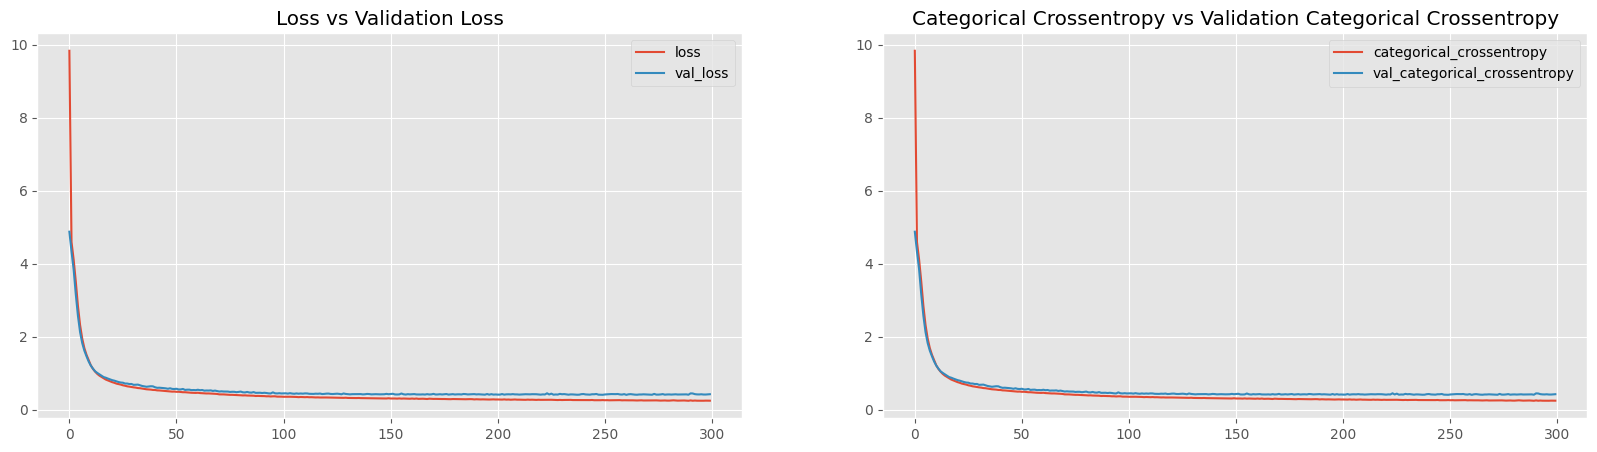

In [108]:
ShowResultPlot(model=Model_2_1)

In [109]:
ShowModelResults(model=Model_2_1,X_val=X_val,X_test=X_test,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 1ms/step

Validation Dataset Results:
Precision Score: 0.9379260229772866
Recall Score: 0.93573464628142
F1 Score: 0.9339360898494221

Test Dataset Results:
Precision Score: 0.9375769474056459
Recall Score: 0.9331922611850061
F1 Score: 0.9306407153735607


### 2.2 **With Preprocessing**

In [110]:
stdscaler = StandardScaler()
X_train_transformed = stdscaler.fit_transform(X_train,y_train_transformed)
X_val_transformed = stdscaler.transform(X_val)
X_test_transformed = stdscaler.transform(X_test)

In [111]:
Model_2_2 = Sequential()
Model_2_2.add(Input(shape=X_train.shape[1]))
Model_2_2.add(Dense(units=32,activation='relu'))
Model_2_2.add(Dense(units=16,activation='relu'))
Model_2_2.add(Dense(units=160,activation='softmax'))

Model_2_2.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [112]:
Model_2_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                256       
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 160)               2720      
                                                                 
Total params: 3504 (13.69 KB)
Trainable params: 3504 (13.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
Model_2_2.fit(X_train_transformed,y_train_transformed,epochs=300,batch_size=256,validation_data=(X_val_transformed,y_val_transformed))

Epoch 1/300
101/101 [==============================] - 1s 6ms/step - loss: 4.8538 - categorical_crossentropy: 4.8538 - val_loss: 4.4620 - val_categorical_crossentropy: 4.4620
Epoch 2/300
101/101 [==============================] - 0s 4ms/step - loss: 3.7957 - categorical_crossentropy: 3.7957 - val_loss: 3.0482 - val_categorical_crossentropy: 3.0482
Epoch 3/300
101/101 [==============================] - 0s 4ms/step - loss: 2.4736 - categorical_crossentropy: 2.4736 - val_loss: 1.9764 - val_categorical_crossentropy: 1.9764
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 1.6452 - categorical_crossentropy: 1.6452 - val_loss: 1.3685 - val_categorical_crossentropy: 1.3685
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 1.1763 - categorical_crossentropy: 1.1763 - val_loss: 1.0220 - val_categorical_crossentropy: 1.0220
Epoch 6/300
101/101 [==============================] - 1s 6ms/step - loss: 0.8999 - categorical_crossentropy: 0.8999 - val_lo

#### 2.2.1 **With Preprocessing Observation**

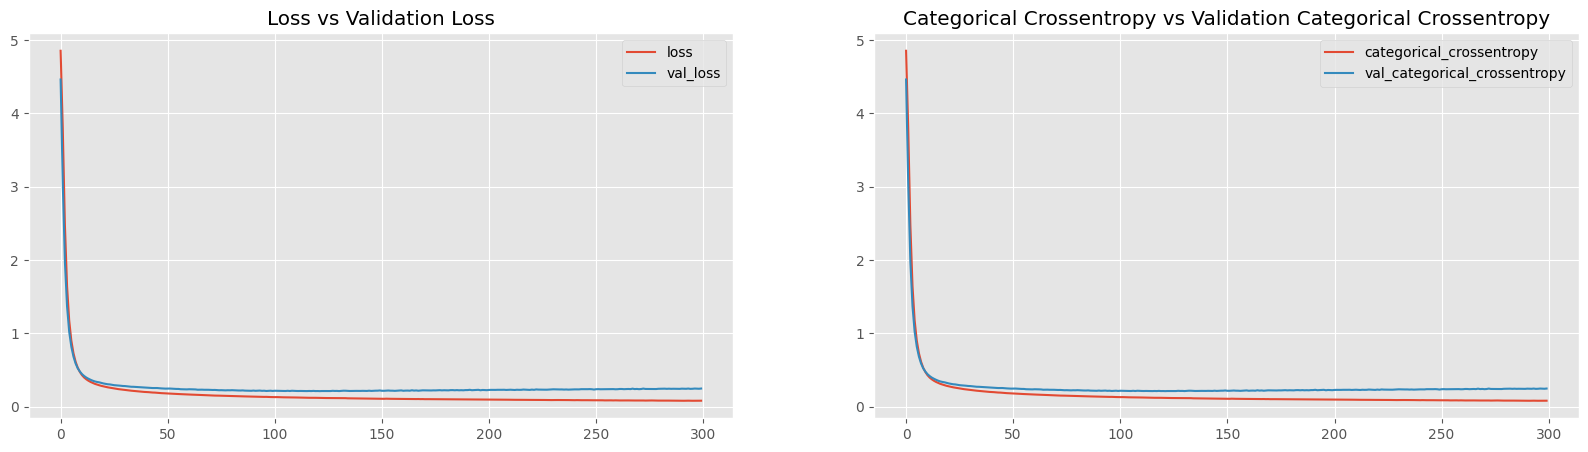

In [114]:
ShowResultPlot(model=Model_2_2)

In [115]:
ShowModelResults(model=Model_2_2,X_val=X_val_transformed,X_test=X_test_transformed,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 1ms/step

Validation Dataset Results:
Precision Score: 0.964046779642775
Recall Score: 0.9624254988338948
F1 Score: 0.9621492681396516

Test Dataset Results:
Precision Score: 0.961225177662394
Recall Score: 0.9579806529625151
F1 Score: 0.95748399507202


# 3 **Observation**
### 1. First approach: Deep Learning Model

- **1.1 Without Preprocessing**
  - **Results**
    - **Validation Dataset Results:**
      - Precision Score: 0.9538063111046422
      - Recall Score: 0.9533557916558694
      - F1 Score: 0.9529298251180423
    - **Test Dataset Results:**
      - Precision Score: 0.959442202526401
      - Recall Score: 0.9570737605804112
      - F1 Score: 0.956713406312731

- **1.2 With Preprocessing (StandardScaler)**
  - **Results**
    - **Validation Dataset Results:**
      - Precision Score: 0.9800860277786542
      - Recall Score: 0.9793988079813423
      - F1 Score: 0.9793840688944555
    - **Test Dataset Results:**
      - Precision Score: 0.9740257135277257
      - Recall Score: 0.9730955259975816
      - F1 Score: 0.9728587812802325

### 2. Second approach: Feature Selection Techniques

- **2.1 Without Preprocessing**
  - **Results**
    - **Validation Dataset Results:**
      - Precision Score: 0.9379260229772866
      - Recall Score: 0.93573464628142
      - F1 Score: 0.9339360898494221
    - **Test Dataset Results:**
      - Precision Score: 0.9375769474056459
      - Recall Score: 0.9331922611850061
      - F1 Score: 0.9306407153735607

- **2.2 With Preprocessing (StandardScaler)**
  - **Results**
    - **Validation Dataset Results:**
      - Precision Score: 0.964046779642775
      - Recall Score: 0.9624254988338948
      - F1 Score: 0.9621492681396516
    - **Test Dataset Results:**
      - Precision Score: 0.961225177662394
      - Recall Score: 0.9579806529625151
      - F1 Score: 0.95748399507202

- ***Comparing the F1 scores, we can see that the model with preprocessing from the first approach has the highest F1 scores for both validation and test datasets. Therefore, the model with preprocessing from the first approach is performing better based on the F1 score metric.***      


# 4 **Fine-tuned the Deep learning model using keras-tuner**

In [214]:
X,y = df.drop(['target'],axis=1),df['target']
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.3, random_state=101,stratify=y_other)

In [213]:
y_train_transformed = pd.get_dummies(y_train)
y_val_transformed = pd.get_dummies(y_val)
y_test_transformed = pd.get_dummies(y_test)

stdscaler = StandardScaler()
X_train_transformed = stdscaler.fit_transform(X_train,y_train_transformed)
X_val_transformed = stdscaler.transform(X_val)
X_test_transformed = stdscaler.transform(X_test)

In [175]:
def buildmodel(hp):
  model = Sequential()
  model.add(Input(shape=X_train.shape[1]))

  for i in range(hp.Int("n_layers",min_value=1,max_value=10, step=1)):

    model.add(Dense(
        units= hp.Int("n_units" + str(i),
                                  min_value=8,
                                  max_value=128,
                                  step=8),

        activation= hp.Choice('activation',
                              values=['relu','sigmoid','tanh'])
        ))

  model.add(Dense(units=160,activation='softmax'))

  lr = hp.Float("n_learning_rate",min_value=0.001,max_value=0.1,step=10,sampling="log")

  model.compile(optimizer=Adam(learning_rate=lr),loss='CategoricalCrossentropy',metrics=['CategoricalCrossentropy'])
  return model

In [176]:
tuner = kt.RandomSearch(buildmodel,objective='val_loss',max_trials=50)

In [177]:
tuner.search(X_train_transformed,y_train_transformed,epochs=30,validation_data=(X_val_transformed,y_val_transformed))

Trial 50 Complete [00h 01m 20s]
val_loss: 0.18243718147277832

Best val_loss So Far: 0.08106581121683121
Total elapsed time: 01h 28m 37s


In [178]:
tuner.get_best_hyperparameters()[0].values

{'n_layers': 1,
 'n_units0': 64,
 'activation': 'tanh',
 'n_learning_rate': 0.01,
 'n_units1': 48,
 'n_units2': 80,
 'n_units3': 128,
 'n_units4': 24,
 'n_units5': 32,
 'n_units6': 56,
 'n_units7': 64,
 'n_units8': 112,
 'n_units9': 96}

In [179]:
tuned_model = tuner.get_best_models(num_models=1)[0]

In [182]:
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 160)               10400     
                                                                 
Total params: 11616 (45.38 KB)
Trainable params: 11616 (45.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
tuned_model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.009999999776482582,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'CategoricalCrossentropy',
 'metrics': ['CategoricalCrossentropy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

In [184]:
es = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=0,
    mode="min"
)

In [186]:
tuned_model.fit(X_train_transformed,y_train_transformed,epochs=300,initial_epoch=30,validation_data=(X_val_transformed,y_val_transformed),callbacks=[es])

Epoch 31/300
804/804 [==============================] - 4s 4ms/step - loss: 0.0497 - categorical_crossentropy: 0.0497 - val_loss: 0.0777 - val_categorical_crossentropy: 0.0777
Epoch 32/300
804/804 [==============================] - 2s 3ms/step - loss: 0.0419 - categorical_crossentropy: 0.0419 - val_loss: 0.0933 - val_categorical_crossentropy: 0.0933
Epoch 33/300
804/804 [==============================] - 2s 3ms/step - loss: 0.0419 - categorical_crossentropy: 0.0419 - val_loss: 0.0849 - val_categorical_crossentropy: 0.0849
Epoch 34/300
804/804 [==============================] - 2s 3ms/step - loss: 0.0355 - categorical_crossentropy: 0.0355 - val_loss: 0.0791 - val_categorical_crossentropy: 0.0791
Epoch 35/300
804/804 [==============================] - 3s 4ms/step - loss: 0.0340 - categorical_crossentropy: 0.0340 - val_loss: 0.0968 - val_categorical_crossentropy: 0.0968
Epoch 36/300
804/804 [==============================] - 2s 3ms/step - loss: 0.0376 - categorical_crossentropy: 0.0376 - 

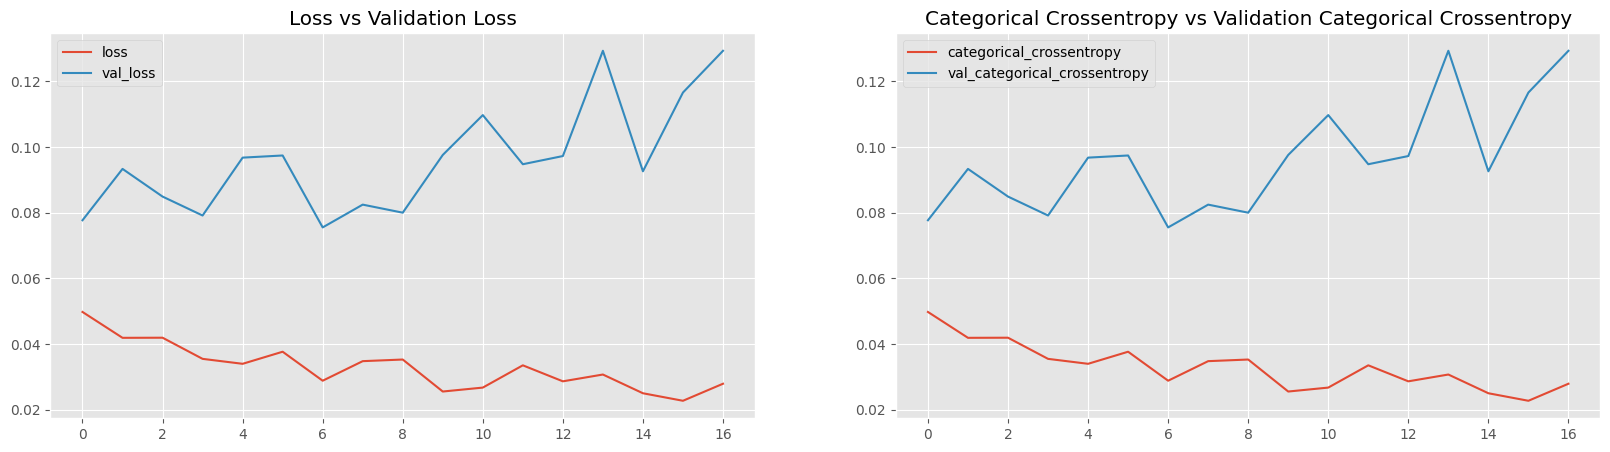

In [187]:
ShowResultPlot(model=tuned_model)

In [188]:
ShowModelResults(model=tuned_model,X_val=X_val_transformed,X_test=X_test_transformed,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 1ms/step

Validation Dataset Results:
Precision Score: 0.9764119647928605
Recall Score: 0.9736978491837264
F1 Score: 0.9709648564050448

Test Dataset Results:
Precision Score: 0.9737170100222656
Recall Score: 0.970677146311971
F1 Score: 0.9677553757933327


In [203]:
Model_4 = Sequential()
Model_4.add(Input(shape=X_train.shape[1]))
Model_4.add(Dense(units=64,activation='relu',kernel_initializer='he_normal'))
Model_4.add(BatchNormalization())
Model_4.add(Dense(units=32,activation='relu',kernel_initializer='he_normal'))
Model_4.add(BatchNormalization())
Model_4.add(Dense(units=16,activation='relu',kernel_initializer='he_normal'))
Model_4.add(BatchNormalization())
Model_4.add(Dense(units=160,activation='softmax'))

Model_4.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [204]:
Model_4.fit(X_train_transformed,y_train_transformed,epochs=300,validation_data=(X_val_transformed,y_val_transformed),callbacks=[es])

Epoch 1/300
804/804 [==============================] - 5s 4ms/step - loss: 2.9455 - categorical_crossentropy: 2.9455 - val_loss: 0.9759 - val_categorical_crossentropy: 0.9759
Epoch 2/300
804/804 [==============================] - 8s 10ms/step - loss: 0.6875 - categorical_crossentropy: 0.6875 - val_loss: 0.2991 - val_categorical_crossentropy: 0.2991
Epoch 3/300
804/804 [==============================] - 4s 5ms/step - loss: 0.3200 - categorical_crossentropy: 0.3200 - val_loss: 0.1987 - val_categorical_crossentropy: 0.1987
Epoch 4/300
804/804 [==============================] - 3s 4ms/step - loss: 0.2271 - categorical_crossentropy: 0.2271 - val_loss: 0.1531 - val_categorical_crossentropy: 0.1531
Epoch 5/300
804/804 [==============================] - 4s 5ms/step - loss: 0.1809 - categorical_crossentropy: 0.1809 - val_loss: 0.1288 - val_categorical_crossentropy: 0.1288
Epoch 6/300
804/804 [==============================] - 3s 3ms/step - loss: 0.1507 - categorical_crossentropy: 0.1507 - val_l

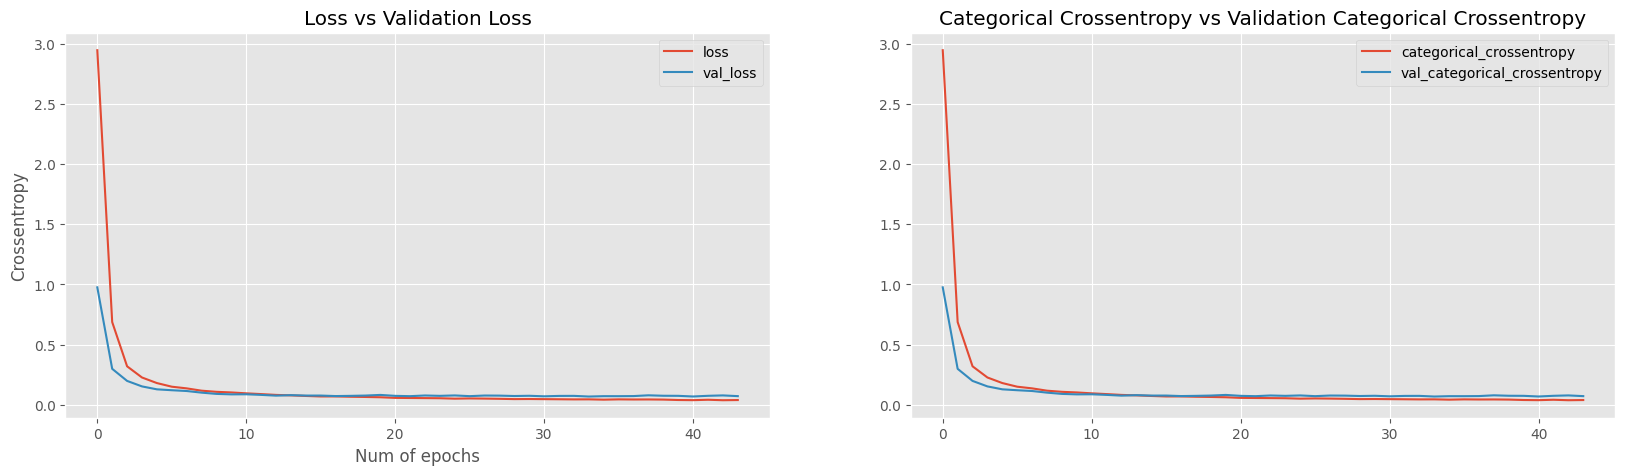

In [205]:
ShowResultPlot(model=Model_4)

In [206]:
ShowModelResults(model=Model_4,X_val=X_val_transformed,X_test=X_test_transformed,y_val=y_val_transformed,y_test=y_test_transformed)

104/104 [==============================] - 0s 2ms/step

Validation Dataset Results:
Precision Score: 0.9851994139683936
Recall Score: 0.9840632288157554
F1 Score: 0.9839837485785184

Test Dataset Results:
Precision Score: 0.9799993254378158
Recall Score: 0.9770253929866989
F1 Score: 0.9767374727376161


# **Final Model**

In [365]:
X,y = df.drop(['target'],axis=1),df['target']


y_transformed = pd.get_dummies(y)

stdscaler = StandardScaler()
X_transformed = stdscaler.fit_transform(X,y_train_transformed)

In [363]:
final_model = Sequential()
final_model.add(Input(shape=X_train.shape[1]))
final_model.add(Dense(units=64,activation='relu',kernel_initializer='he_normal'))
final_model.add(BatchNormalization())
final_model.add(Dense(units=32,activation='relu',kernel_initializer='he_normal'))
final_model.add(BatchNormalization())
final_model.add(Dense(units=16,activation='relu',kernel_initializer='he_normal'))
final_model.add(BatchNormalization())
final_model.add(Dense(units=160,activation='softmax'))

final_model.compile(optimizer=Adam(learning_rate=0.001),loss='CategoricalCrossentropy',metrics='CategoricalCrossentropy')

In [366]:
final_model.fit(X_transformed,y_transformed,epochs=300,validation_split=0.2,callbacks=[es])

Epoch 1/300
919/919 [==============================] - 6s 4ms/step - loss: 2.7359 - categorical_crossentropy: 2.7359 - val_loss: 0.8135 - val_categorical_crossentropy: 0.8135
Epoch 2/300
919/919 [==============================] - 7s 8ms/step - loss: 0.5784 - categorical_crossentropy: 0.5784 - val_loss: 0.2830 - val_categorical_crossentropy: 0.2830
Epoch 3/300
919/919 [==============================] - 3s 3ms/step - loss: 0.2895 - categorical_crossentropy: 0.2895 - val_loss: 0.1953 - val_categorical_crossentropy: 0.1953
Epoch 4/300
919/919 [==============================] - 3s 3ms/step - loss: 0.2080 - categorical_crossentropy: 0.2080 - val_loss: 0.1515 - val_categorical_crossentropy: 0.1515
Epoch 5/300
919/919 [==============================] - 7s 8ms/step - loss: 0.1632 - categorical_crossentropy: 0.1632 - val_loss: 0.1355 - val_categorical_crossentropy: 0.1355
Epoch 6/300
919/919 [==============================] - 6s 7ms/step - loss: 0.1436 - categorical_crossentropy: 0.1436 - val_lo

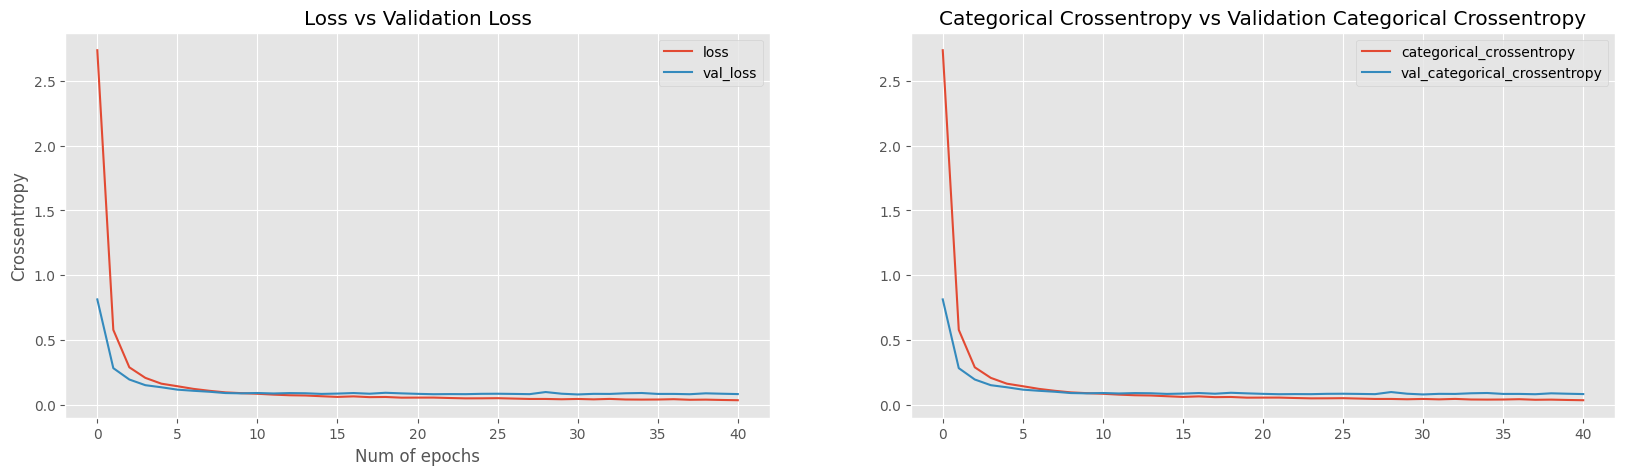

In [367]:
ShowResultPlot(model=final_model)

In [377]:
  # Predictions on validation and test datasets
model_X_pred = final_model.predict(X_transformed)

# Convert one-hot encoded predictions to class labels
model_y_orig = np.array(y_transformed).argmax(axis=1)
model_y_predictions = model_X_pred.argmax(axis=1)


# Compute and print evaluation metrics for the validation dataset

print("\nValidation Dataset Results:")
print(f"Precision Score: {precision_score(model_y_orig, model_y_predictions, average='weighted')}")
print(f"Recall Score: {recall_score(model_y_orig, model_y_predictions, average='weighted')}")
print(f"F1 Score: {f1_score(model_y_orig, model_y_predictions, average='weighted')}")

1149/1149 [==============================] - 4s 3ms/step

Validation Dataset Results:
Precision Score: 0.9904692538630598
Recall Score: 0.9903406617326949
F1 Score: 0.9902855347488203


In [379]:
predictions = final_model.predict(X_transformed)
pred = pd.DataFrame(predictions,columns=y_transformed.columns).idxmax(axis=1)
result_df = pd.concat([pred[:50], df.iloc[:50,-1]], axis=1)

# Print the concatenated DataFrame
print(result_df)


1149/1149 [==============================] - 3s 3ms/step
      0 target
0   B37    B37
1   B61    B61
2   A19    A19
3   A22    A22
4   A33    A33
5   A75    A75
6   A41    A41
7   B14    B14
8   B80    B80
9   A33    A33
10  B64    B64
11   A1     A1
12  B21    B21
13  A70    A70
14  B57    B57
15   B9     B9
16  B50    B50
17  B31    B31
18  A21    A21
19  B30    B30
20  B37    B37
21  B37    B37
22   A4     A4
23  B50    B50
24  B40    B40
25   B6     B6
26  A64    A64
27  A33    A33
28  B40    B40
29  A25    A25
30  B18    B18
31  A66    A66
32  A33    A33
33  A53    A53
34  B73    B73
35  A75    A75
36  A50    A50
37  B25    B25
38  B73    B73
39  A29    A29
40   A1     A1
41  B61    B61
42  A35    A35
43   A3     A3
44  A33    A33
45  A46    A46
46  B45    B45
47  A36    A36
48   B5     B5
49  A79    A79


In [368]:
test_df = pd.read_excel('/content/gdrive/MyDrive/DataSets/Task1and2/test.xlsx')

In [369]:
test_transformed = stdscaler.transform(test_df)

In [370]:
predictions = final_model.predict(test_transformed)

493/493 [==============================] - 1s 2ms/step


In [374]:
pred = pd.DataFrame(predictions,columns=bm.y_transformed.columns).idxmax(axis=1)

In [375]:
pred.head(15)

0     B74
1     A10
2     B65
3     B20
4     A67
5     B34
6     B64
7     A33
8     B77
9      B2
10    B28
11    A35
12    A69
13    B33
14    A64
dtype: object